<a href="https://colab.research.google.com/github/sophieanthony/QTM250HW4/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**Volume and the Speech API**

![img](https://github.com/jeeya-js/QTM250-example/blob/main/2022-10-24_Marketing_November-Week-2_Arellano_Blog-Hero_775x225.jpg?raw=TRUE)

image imported from github repository
<center>


#Introduction 

"Order! Order in the court!" Did you hear that correctly? Probably, but what about the Google Speech-to-Text API?

The Google Speech-to-Text API is commonly used to generate transcriptions from audio files. Any audio file can be imported into the model. Then, it will generate a transcription and a confidence level. The confidence level tells us how certain the model is that it's transcription is accurate. Machine learning models are only as good as the data they are trained on. 


Applications of speech-to-text transciption are widespread and only growing, increasing accessibility and efficiency. Imagine, for example, the potential application of transcription APIs in the courtroom where the conversations in the room are recorded and transcribed into text. However, such use can only be supported by an accurate, unbiased machine learning model. After all, a miscommunication in the courtroom can be legally devastating. As such, it is imperative to locate hidden variables within a machine learning model to improve its accuracy and function. 


Say you have a soft-spoken person and then a loud person give a testimony. Whose voice will be heard? Hopefully, both, but we plan to investigate if that really is the case. We might suspect bias in the transcription output due to volume level. 

For our research, we want to investigate how confident and accurate the model is when analyzing audio files of different volumes. If the accuracy or confidence of the model decreases as the volume decreases, it may reflect a fault in the model. 

##So, we tested the following sentence: 

In [ ]:
%%html
<marquee style='width: 100%; color: red;'><b>No need to light a night-light on a light night like tonight.</b></marquee>

#Hypothesis

If the volume of the audio file is decreased, then the accuracy and confidence of the model will also decrease.

#Methods

### Data Generation Methods
1. We first chose a single statement that we wanted to be transcripted by the Speech API. As stated before, the sentence goes as the following: 

  "*No need to light a night-light on a light night like tonight.*"

2. A single group member said that statement on a recording and it was saved as an audio file.

3. We uploaded the audio file to iMovie because it has a function in which the volume level of an audio file can be manually changed. This allowed us to have a standardized way to change the volume level using the same initial recording. We created new audio files (derived from the original audio file) with the following volume levels: 25, 50, 75, 100, 125, 150, 175, and 200.

4. We then used the Speech API to transcribe the audio file of each volume level. The API gave us the transcription and the confidence of the transcription, which is our primary data.

The following section gives an in-depth look of the actual coding procedures used to carry out data generation.

### Coding Methods

The coding methodology used is delineated through the following steps:

1. On the Google Cloud Console, we generated a unique API key in order to enable the Speech API functions.

2. On Google Shell, we exported our API key as "API_KEY". This allowed the API key to be easily referenced in future codes.

3. In order to create the Speech API request, we edited a JSON file with the following code:

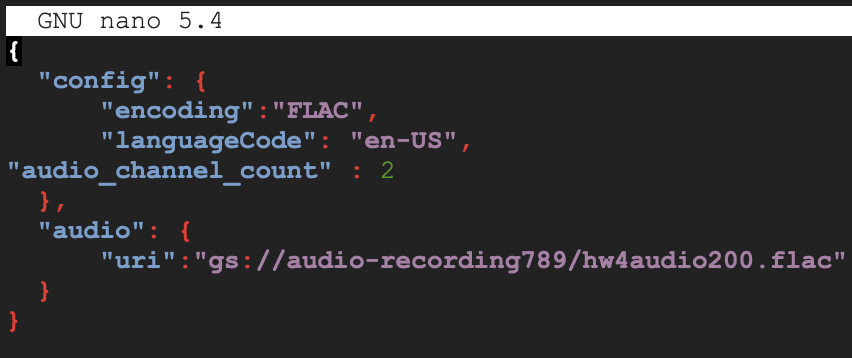

The attributes in this code specifies the file type (.flac), the audio channel count (2), and the URI for the audio file that was stored in a cloud bucket.

4. We then called the Speech API with the following curl command:

**curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json \
"https://speech.googleapis.com/v1/speech:recognize?key=${API_KEY}"**

Below shows one of the resulting outputs we received using this curl command:
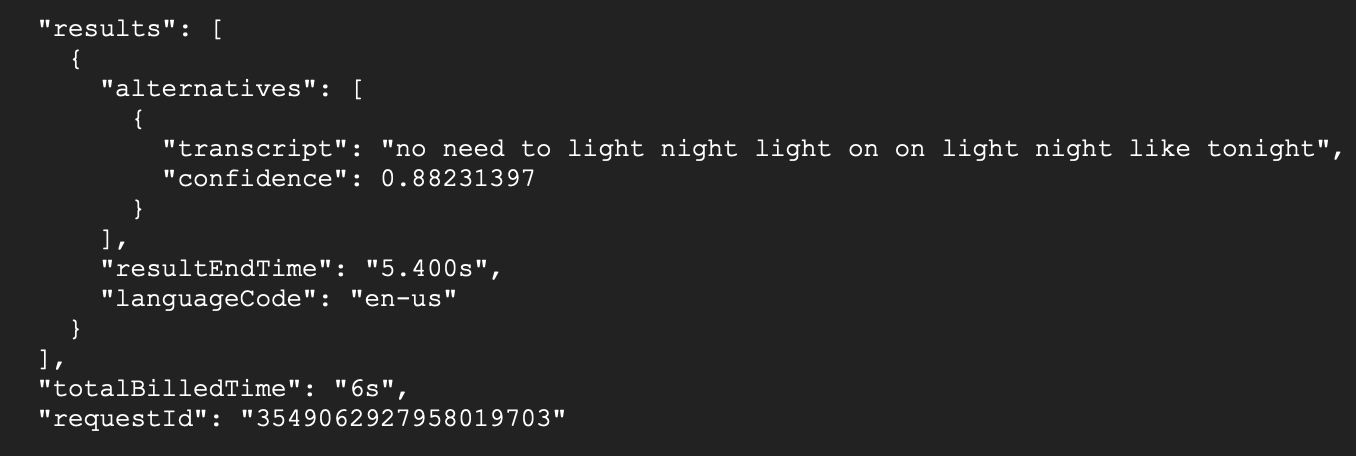

This output provides us with the transcript and the confidence of the transcription, which are the primary components of our data of interest.

5. We then saved the outputs for each audio file of varying volume levels with the following curl command:

**curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json \
"https://speech.googleapis.com/v1/speech:recognize?key=${API_KEY}" > result.json**

Saving the outputs allowed us to download the JSONs with the outputs.

## Results/Visualizations

#### Visualization Methods:

1. The results from the Speech API for each audio file were recorded in an excel spreadsheet [found here](https://emory-my.sharepoint.com/:x:/r/personal/clsamu4_emory_edu/Documents/QTM%20Homework%204%20Data.xlsx?d=wd1058a1e536944c9a59c3a9544f371b9&csf=1&web=1&e=7C7TV1).

2. We then used SQL to retrieve the data so it can be visually presented on Looker Studio. The Looker Studio dashboard can be [found here](https://lookerstudio.google.com/reporting/804c464d-714a-4f99-a93d-51b4b595959d).

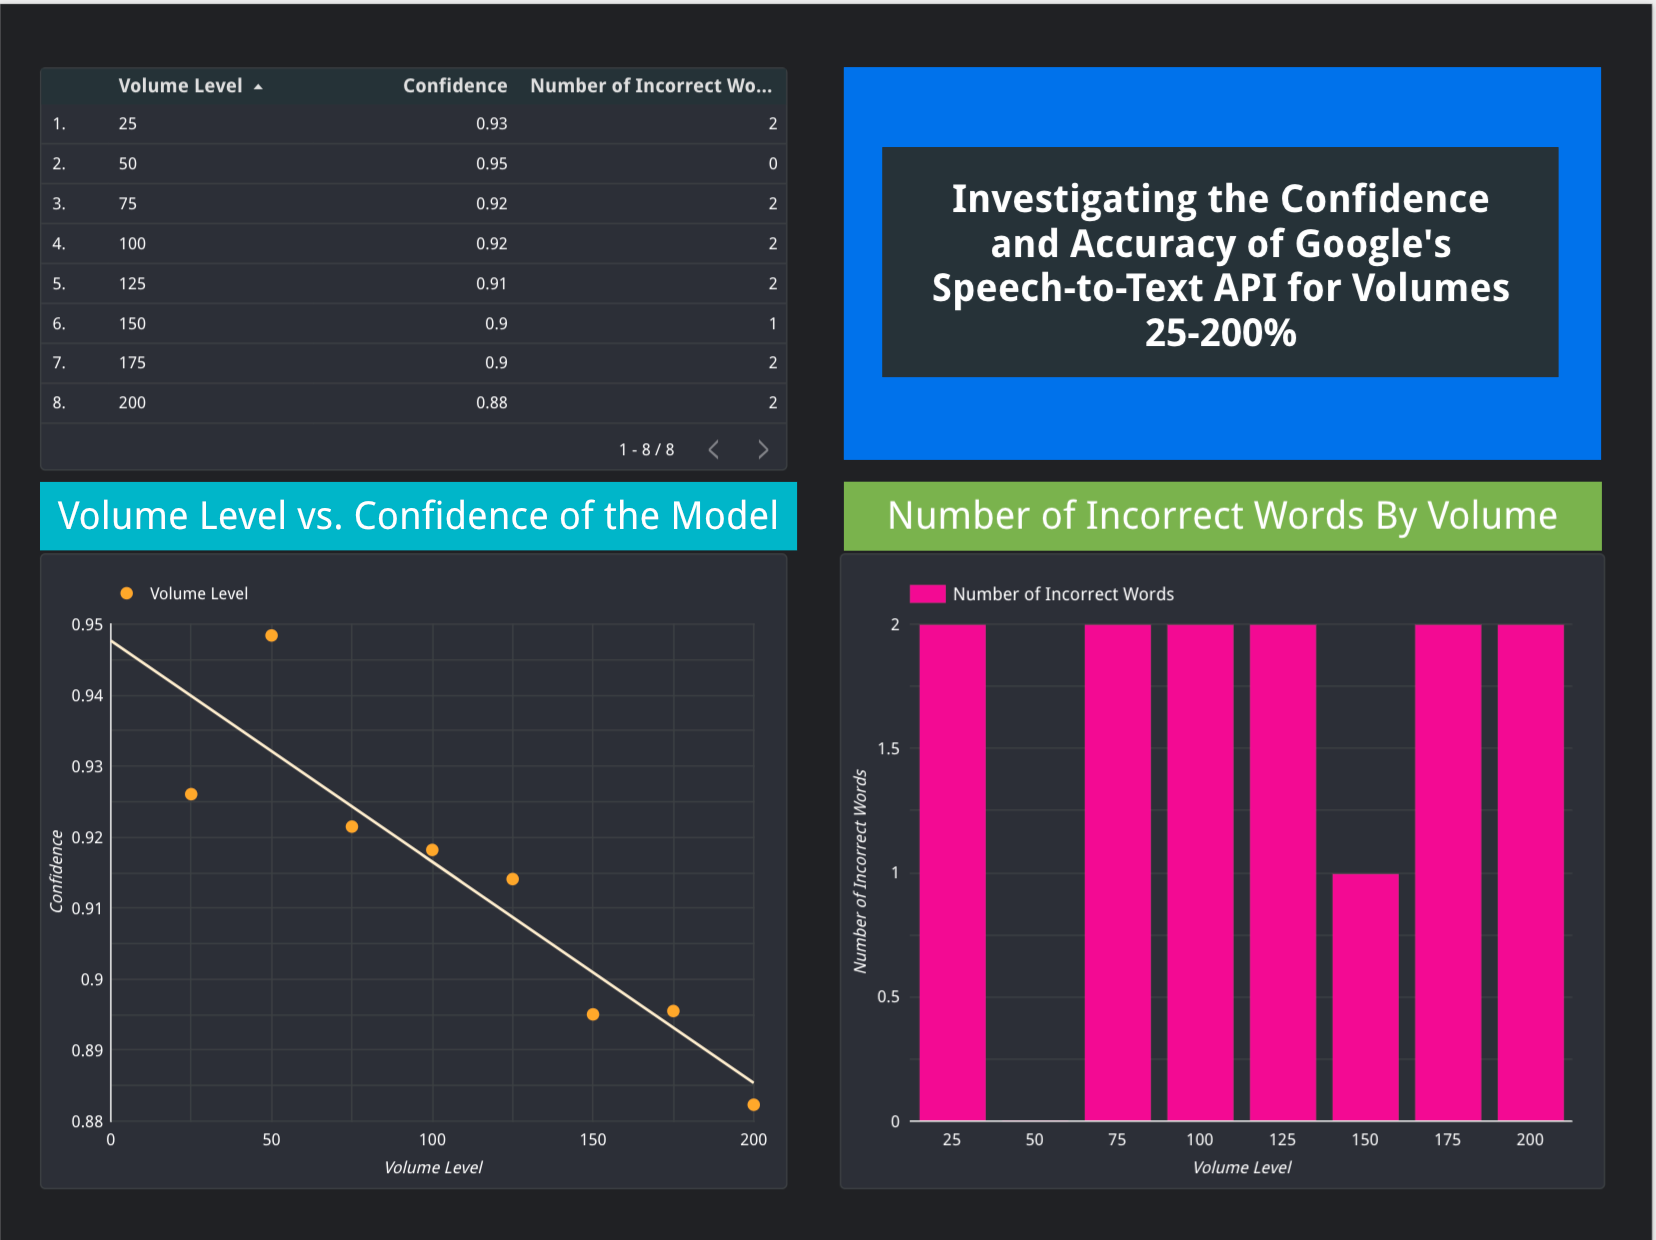

**Graph 1. Volume Level vs. Confidence of the Model** 

The first graph demonstrates the relationship between volume level and confidence of the model. The confidence of the transcription seems to increase as volume increases until we approach a volume level of 50%. After 50%, the confidence of the transcriptions decreases with every successive increase in volume level.

**Graph 2. Number of Incorrect Words By Volume**

The second graph shows the relationship between the number of incorrect words associated with different volume levels. In the second graph, the overall trend when the volume is above 0 is a relatively unchanging number of incorrect words. The 50% volume had the highest confidence and was the only volume at which the transcription was accurate.

## Conclusions 

Graphs 1 and 2 create a clear understanding of the accuracy of this speech-to-text API with regards to the impact of volume. From graph 1, we are able to see that as a person speaks louder and louder, the model's confidence decreases. This contradicts our hypothesis. One possible reason that louder volumes lead to lower confidence may be that the recording is less clear when it is louder, especially over 100% volume. From graph 2, we see that as volume level increases, the average number of incorrect words stays relatively the same. One thing that is importnat to note here is that there seems to be a relatively contstant value of incorrect words being transcribed at a variety of different volume levels, suggesting a potential baseline error that may need to be improved upon. However, we do note that it is important to take into consideration that the voice memo that we recorded is considered to be a tongue twister-like sentence. While this or the way some words were said in the recording could attribute to this baseline inaccuracy, it is important to note that many times speech is not perfect and will have fluctuations, changes in pitch, and much more. When using APIs like this, it is imperative that we are confident that the model can take such factors into account in order to the create the most effective and accurate translation. It is also interesting to note that the 50% volume recording was accurate (zero incorrect words) and had the highest confidence. This suggests that the confidence score of the model reflects the accuracy of the recording well.

## Limitations and Future Directions

We minimized confounding variables by using one audio recording that was manipulated to output at different volumes; however, the use of one audio recording may be a limitation in that the clarity of audio can vary from speaker to speaker. Additionally, background noise can distort audio. Sampling different speakers and accounting for more of the variability in speech, such as accents, tone, speaking rate, intensity, and pitch might improve measurements of hidden variables within the Speech API as well.  

## Relevance

In accuracy-dependent, high stakes scenarios (such as legal proceedings), it is especially important that accurate transcriptions are able to be generated through the use of the APIs like the Speech-to-Text API. While many courtrooms may still have court reporters, with rapidly developing technologies, it may only be a matter of time before there is a more sizable conversion towards automatic language processing and transcribing. It is important to consider that a variety of different types of people can step into a court room, ranging from those with high-pitched, softer voices to those with loud, booming voices. Being able to take into account volume especially and tune models towards the highest level of accuracy is imperative. 

Additionally, closed captioning is crucial with regards to accessibility (especially for people with audition-related disabilities) for those who need to see text in order to understand various forms of media. In order to promote inclusivity, it is imperative that speech to text translations are as accurate as possible. If translations are incorrect, it could lead the the spread of misinformation or daily hassles/issues. 


This study gives us a small insight into the current state of accuracy and where we can go from here.


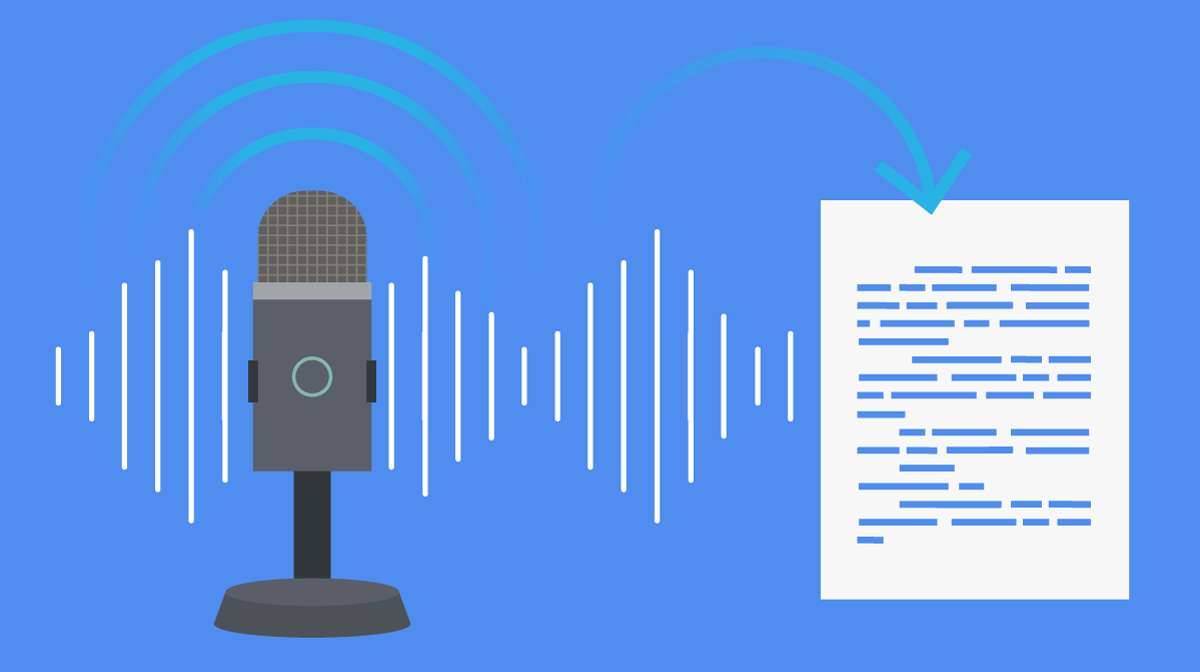